<a href="https://colab.research.google.com/github/nusratsadia/DiabetesStudy/blob/main/DiabetesStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## EDA

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
#from sklearn.ensemble import RandomForestClassifier


## Data Preprocessing

In [ ]:
#Required Imports
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pickle

In [ ]:
#subset of data
df=df[['Patient_ID','Age_at_Exam','Sex','BMI', 'LDL', 'HDL', 'FBS','Diabetes']]
# Renaming a single column
df.rename(columns={'Age_at_Exam': 'Age'}, inplace=True)

df.head(2)

<ipython-input-7-c0b968b78203>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Age_at_Exam': 'Age'}, inplace=True)


,Patient_ID,Age,Sex,BMI,LDL,HDL,FBS,Diabetes
0,4.001000e+15,65.0,Female,31.0,1.7,1.1,5.8,0.0
1,4.001000e+15,62.0,Female,25.8,2.5,1.4,5.4,0.0


In [ ]:
df = pd.read_csv("sample_data/DiabetesStudy.csv")
df.shape

(10000, 43)

In [ ]:

df1 = df.drop_duplicates("Patient_ID", keep=False)
print(df1.shape)
df1=df1.drop(['Patient_ID'], axis = 1)
df1 = df1.dropna()
df1.isnull().sum()

(6512, 8)


Age         0
Sex         0
BMI         0
LDL         0
HDL         0
FBS         0
Diabetes    0
dtype: int64

In [ ]:
# Using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1=df1.copy()
df1['Sex_'] = label_encoder.fit_transform(df1['Sex'])
#df1 = df1.drop(['Sex'], axis = 1)
df1

,Age,Sex,BMI,LDL,HDL,FBS,Diabetes,Sex_
0,65.0,Female,31.0,1.7,1.1,5.8,0.0,0
1,62.0,Female,25.8,2.5,1.4,5.4,0.0,0
3,51.0,Female,56.7,2.8,1.9,6.0,0.0,0
4,40.0,Female,33.1,2.5,1.2,5.2,0.0,0
5,60.0,Female,67.8,2.2,1.4,5.4,0.0,0
...,...,...,...,...,...,...,...,...
9986,69.0,Male,30.1,1.4,0.6,7.7,1.0,1
9989,54.0,Female,31.2,3.2,1.2,7.2,1.0,0
9995,78.0,Female,32.4,3.8,1.6,7.7,1.0,0
9998,59.0,Female,25.1,3.4,1.5,5.7,1.0,0


In [ ]:
df1.drop(['Sex'], axis = 1, inplace= True)
df1

,Age,BMI,LDL,HDL,FBS,Diabetes,Sex_
0,65.0,31.0,1.7,1.1,5.8,0.0,0
1,62.0,25.8,2.5,1.4,5.4,0.0,0
3,51.0,56.7,2.8,1.9,6.0,0.0,0
4,40.0,33.1,2.5,1.2,5.2,0.0,0
5,60.0,67.8,2.2,1.4,5.4,0.0,0
...,...,...,...,...,...,...,...
9986,69.0,30.1,1.4,0.6,7.7,1.0,1
9989,54.0,31.2,3.2,1.2,7.2,1.0,0
9995,78.0,32.4,3.8,1.6,7.7,1.0,0
9998,59.0,25.1,3.4,1.5,5.7,1.0,0


0.0    3544
1.0    2879
Name: Diabetes, dtype: int64


<Axes: >

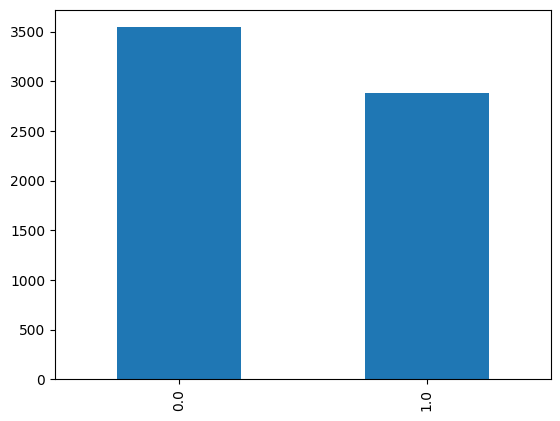

In [ ]:
y = df1["Diabetes"]
X = df1.drop("Diabetes", axis=1)

#always check how imbalanced our dataset might be
print(y.value_counts())
y.value_counts().plot(kind="bar")

In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
model = RandomForestClassifier()

# Perform cross-validation with different hyperparameter values
hyperparameter_values = [10, 50, 100]
for n_estimators in hyperparameter_values:
    model.n_estimators = n_estimators
    scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    avg_score = scores.mean()
    print(f"n_estimators: {n_estimators}, Average Score: {avg_score}")


n_estimators: 10, Average Score: 0.8024462091619655
n_estimators: 50, Average Score: 0.8067301535582085
n_estimators: 100, Average Score: 0.8104281671143712


Cross-validation is a valuable tool to guide hyperparameter tuning and make informed decisions about the best configuration for your model. It's essential to strike a balance between model complexity (tuned via hyperparameters) and generalization performance, and cross-validation helps you achieve that balance

In [ ]:
from collections import Counter
# Count class occurrences
class_counts = Counter(df1['Diabetes'])
print("Class Counts:", class_counts)

Class Counts: Counter({0.0: 3544, 1.0: 2879})


In [ ]:
# Calculate class proportions
total_samples = len(df1)
class_proportions = {cls: count / total_samples for cls, count in class_counts.items()}
print("Class Proportions:", class_proportions)


Class Proportions: {0.0: 0.5517670870309824, 1.0: 0.44823291296901757}


In [ ]:
# Calculate resampling ratio
majority_class = max(class_counts, key=class_counts.get)
minority_class = min(class_counts, key=class_counts.get)
print(majority_class)
print(minority_class)

0.0
1.0


In [ ]:
resampling_ratio = class_counts[majority_class] / class_counts[minority_class]
print("Resampling Ratio:", resampling_ratio)

Resampling Ratio: 1.230982980201459


In the context of machine learning, "resampling_ratio" typically refers to the ratio of the number of instances in one class compared to another class in a dataset. This concept is commonly used in imbalanced classification problems where the number of instances in one class significantly outweighs the number of instances in another class.

Imbalanced datasets can pose challenges for machine learning models as they may result in biased or inaccurate predictions. In such cases, resampling techniques are employed to balance the class distribution and improve the model's performance. The "resampling_ratio" plays a key role in these techniques.

There are two main strategies for dealing with imbalanced datasets:

Oversampling: This involves increasing the number of instances in the minority class. This can be done by duplicating existing instances or generating synthetic instances using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

Undersampling: This involves reducing the number of instances in the majority class. This can help balance the class distribution and prevent the model from being biased towards the majority class.

The "resampling_ratio" determines the balance between the two classes after resampling. For example, if you have a ratio of 1:2, it means that for every instance in the minority class, there are two instances in the majority class after resampling. Similarly, a ratio of 1:1 would indicate that the classes are balanced.

When implementing resampling techniques, it's important to strike a balance between addressing the class imbalance and not introducing too much noise into the dataset. The appropriate "resampling_ratio" depends on the specific problem, the characteristics of the data, and the performance of the machine learning model.

<Axes: >

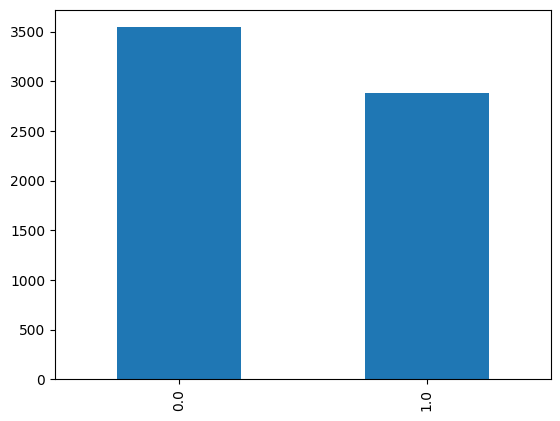

In [ ]:
y.value_counts().plot(kind="bar")

In [ ]:
# Scaling using MinMaxScaler
min_max_scaler = MinMaxScaler().fit(X)
normTrainX = min_max_scaler.transform(X)
print('normTrainX', normTrainX.shape)

normTrainX (6423, 6)


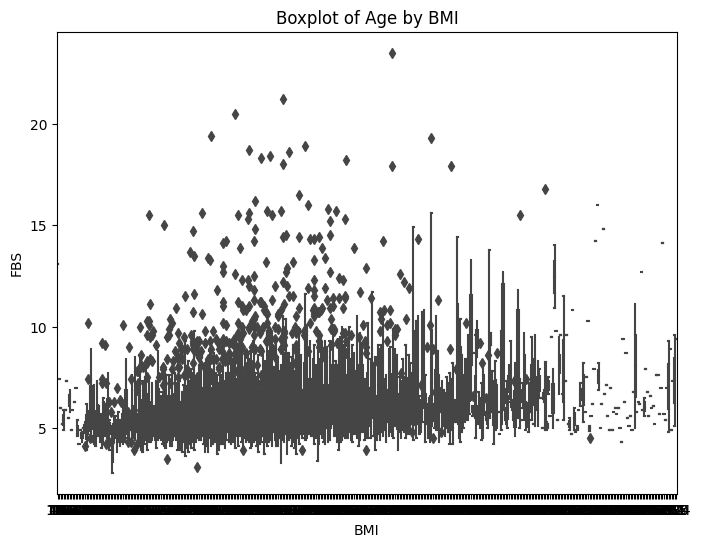

In [ ]:
# Boxplot for outliers in x_train dataset
import seaborn as sns
#sns.boxplot(df1 = X["BMI"])


# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="BMI", y="FBS", data=df1)

# Add labels and title
plt.xlabel("BMI")
plt.ylabel("FBS")
plt.title("Boxplot of Age by BMI")

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
# Select the top 'k' features based on the ANOVA F-value
k = 4  # Set the number of features you want to select

selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

# Create a new DataFrame with only the selected features
selected_data = X[selected_features]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['BMI', 'LDL', 'HDL', 'FBS'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Load your dataset into a pandas DataFrame
# Assuming your data is in a CSV file named "data.csv"
#data = pd.read_csv("data.csv")

# Step 2: Separate the target variable and features
# Assuming the target variable is in a column named "target"
#X = data.drop("target", axis=1)
#y = data["target"]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform feature scaling on the training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Perform feature selection using SelectKBest and ANOVA F-value
k = 5  # Set the number of features you want to select

selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 6: Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

#
feature_scores = selector.scores_[selected_feature_indices]

# Step 5: Print the selected features and their corresponding scores
print("Selected Features and their Scores:")
for feature, score in zip(selected_features, feature_scores):
    print(f"{feature}: {score:.4f}")


Selected Features and their Scores:
Age: 152.1818
BMI: 195.7237
LDL: 482.9722
HDL: 395.7245
FBS: 2366.3177


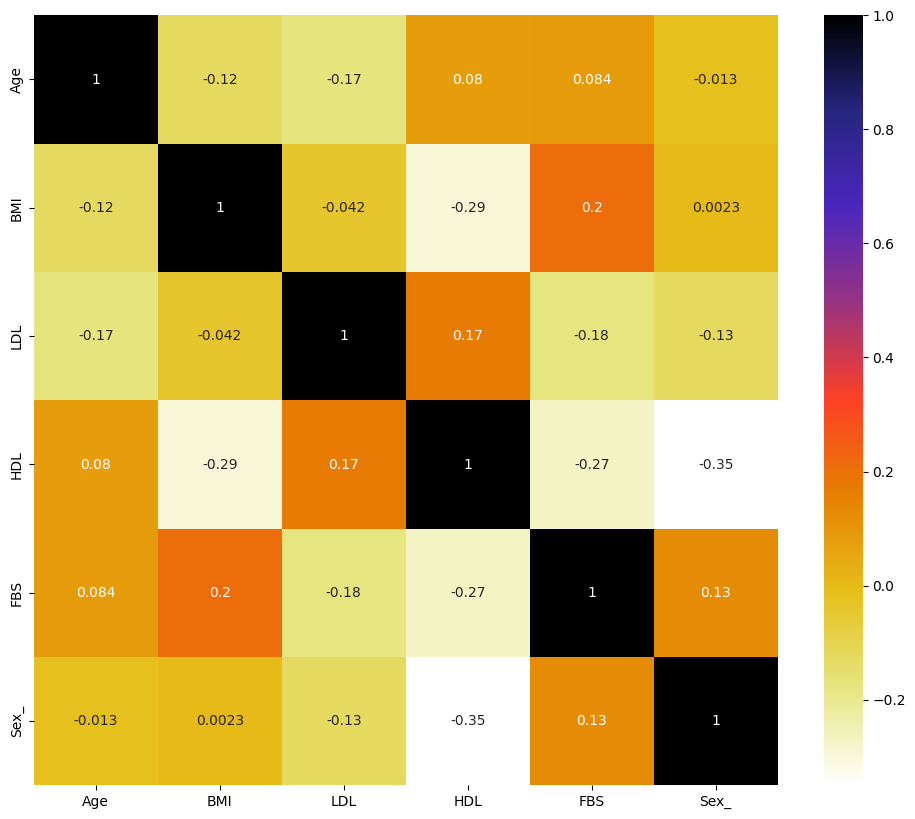

In [ ]:
#Using Pearson Correlation
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()


## Modeling

In [ ]:

#import pandas as pd
#from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 6: Train your machine learning model using the selected features
# For example, you can use a Random Forest classifier with the selected features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set and evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.8280155642023346


In [ ]:
#Display classes
rf_classifier.classes_

array([0., 1.])


## Conclusion

In [ ]:
#Accuracy Report
# Print the Classification Report
# y_test has true label / target values for test features,
# y_pred has predicted label / target values for test features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       723
         1.0       0.84      0.75      0.79       562

    accuracy                           0.83      1285
   macro avg       0.83      0.82      0.82      1285
weighted avg       0.83      0.83      0.83      1285



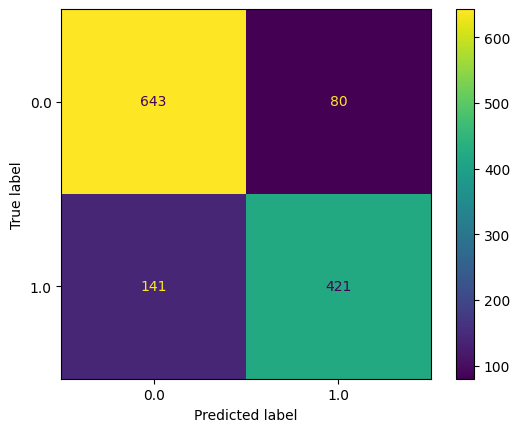

In [ ]:
#Confusion Matrix
# Build and Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot()
plt.show()

In [ ]:

import numpy as np
from sklearn import datasets
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC

# Load the Iris dataset
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01]  # Kernel coefficient for 'rbf' and 'poly'
}


In [ ]:
# Step 5: Model Selection (SVM in this example)
clf = SVC()

# Step 6: Model Training
clf.fit(X_train, y_train)

SVC()

In [ ]:
# Initialize GridSearchCV with the SVM classifier and the hyperparameter grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
# Step 7: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}




In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
# Step 8: Get the best hyperparameters found during the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Step 9: Train the final model using the best hyperparameters on the entire training set
final_model = SVC(**best_params)
final_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [ ]:
# Step 10: Model Evaluation
train_accuracy = final_model.score(X_train, y_train)
test_accuracy = final_model.score(X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8275593616193071
Test Accuracy: 0.8233463035019455


In [ ]:
y_pred=final_model.predict(X_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
y_pred=rf_classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# count of unique values in the target
df1['Diabetes'].nunique()

2

In [ ]:
# display unique values in the target
print(df1['Diabetes'].unique())

[0. 1.]


In [ ]:
# split dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (5138, 6)
x_test:  (1285, 6)
y_train:  (5138,)
y_test:  (1285,)


In [ ]:
# using RandomForestClassifier to build the model

#Random forests is a supervised learning algorithm.
#It can be used both for classification and regression.
#It is also the most flexible and easy to use algorithm.

rfc = RandomForestClassifier(random_state=15)
# fit the model
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

In [ ]:
#Predict using test data
y_pred = rfc.predict(x_test)
print(y_pred)

[0. 0. 1. ... 0. 1. 0.]


In [ ]:
#Print actual test values
print(y_test)

670     0.0
4019    0.0
5550    1.0
5278    1.0
5936    1.0
       ... 
2273    0.0
5374    1.0
3554    0.0
9353    1.0
2812    0.0
Name: Diabetes, Length: 1285, dtype: float64


In [ ]:
#Evaluate the model using accuracy_score
score = accuracy_score(y_pred, y_test)
print('Our accuracy score for this model is {}'.format(score))

Our accuracy score for this model is 0.8124513618677043


In [ ]:
# accuracy of the model in percent format upto 2 floating points
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is: {accuracy*100:.2f}%')

The accuracy is: 81.25%


In [ ]:
#Display classes
rfc.classes_

array([0., 1.])

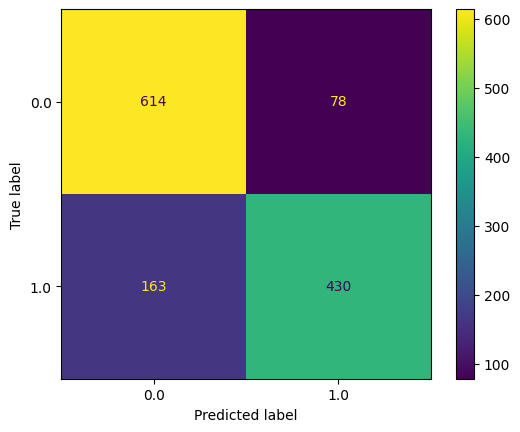

In [ ]:
# Build and Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [ ]:
# Print the Classification Report
# y_test has true label / target values for test features,
# y_pred has predicted label / target values for test features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       692
         1.0       0.85      0.73      0.78       593

    accuracy                           0.81      1285
   macro avg       0.82      0.81      0.81      1285
weighted avg       0.82      0.81      0.81      1285



In [ ]:
# print the number of correctly classified samples
print(accuracy_score(y_test, y_pred, normalize=False))

1044


In [ ]:
# print the fraction of correctly classified samples
print(accuracy_score(y_test, y_pred))

0.8124513618677043


In [ ]:
# accuracy of the model in percent format upto 2 floating points
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is: {accuracy*100:.2f}%')

The accuracy is: 81.25%


In [ ]:
# Convert categorical values to numerical values for use in correlation
#features = pd.get_dummies(features)
#target, uniques = pd.factorize(target)
y, uniques = pd.factorize(y)

In [ ]:
# Donot run this cell It will produce an error

#Store trained model
rf_pickle = open('data/random_forest_dbs.pickle', 'wb')

pickle.dump(rfc, rf_pickle)

rf_pickle.close()

output_pickle = open('data/output_dbs.pickle', 'wb')

pickle.dump(uniques, output_pickle)

output_pickle.close()

In [ ]:
# https://colab.research.google.com/drive/1v41gDeSPWMPHJcMxIulO9fCBUgkjb9P7#scrollTo=TUE5iHssJaEf

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),
                  ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)

    print("="*30)

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()